# Домашнее задание "Теория вероятности. Непрерывные Случайные Величины".

### Уровень 0:

- Задание 1

Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента; на одном графике.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.integrate

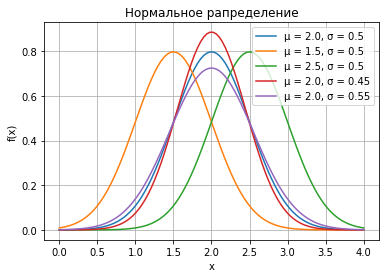

In [ ]:
for vals in [(2.0, 0.5), (1.5, 0.5), (2.5, 0.5), (2.0, 0.45), (2.0, 0.55)]:
    norm_rv = sts.norm(loc=vals[0], scale=vals[1])
    x = np.linspace(0, 4, 100)
    y = norm_rv.pdf(x)
    plt.plot(x, y, label=f"µ = {vals[0]}, σ = {vals[1]}")

plt.title("Нормальное рапределение")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()

Пик плотности распределения находится над µ, и при изменении этого параметра смещается соответственно.
Изменение σ влияет на высоту и ширину купола: при увеличении значения σ купол становится более широким и низким, и наоборот.

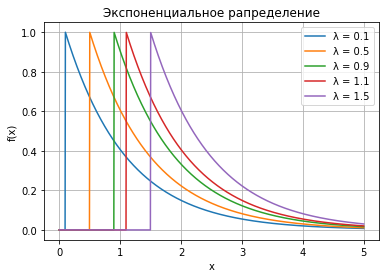

In [ ]:
for lamda in [0.1, 0.5, 0.9, 1.1, 1.5]:
    expon_rv = sts.expon(lamda)
    x = np.linspace(0, 5, 1000)
    y = expon_rv.pdf(x)
    plt.plot(x, y, label=f"λ = {lamda}")

plt.title("Экспоненциальное рапределение")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()

С увеличением λ, график смещается вправо.

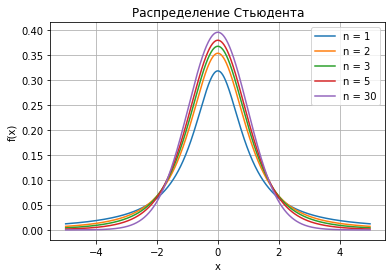

In [ ]:
for n in [1, 2, 3, 5, 30]:
    t_rv = sts.t(n)
    x = np.linspace(-5, 5, 1000)
    y = t_rv.pdf(x)
    plt.plot(x, y, label=f"n = {n}")

plt.title("Распределение Стьюдента")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()

Изменение числа степеней свободы n влияет на высоту и ширину купола: при увеличении значения n купол становится более узким и высоким, и наоборот.

### Уровень 1:

- Задание 2

Непрерывная случайная величина задана плотностью распределения:$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$Найдите C, математическое ожидание $\xi$ а также вероятность попадания $\xi$ в отрезок $[3.5;7]$, т.е. P(3.5<$\xi$<7).

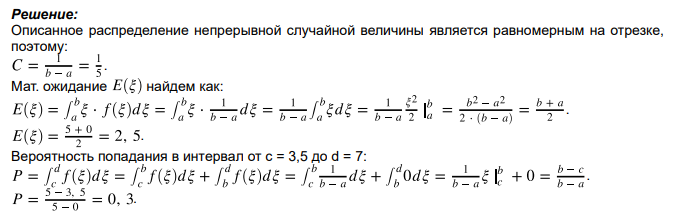



Так как С - константа, то перед нами равномерное распределение. Коэфициент равномерного распределения найдем по формуле: $1/(b-a) = 1/(5-0) = 1/5$

Функция плотности распределения выглядит следующим образом:

$\begin{equation*}
 \begin{cases}
   1/5, \xi \in [0;5]
   \\
   0, \xi \notin [0;5]
 \end{cases}
\end{equation*}$

Найдем функцию распределения.

Значение функции распределения для промежутка $\xi \in (-\infty;0)$:  
$\int_{-\infty}^{0}0dx = 0$

Значение функции распределения для промежутка $\xi \in [0, 5]$:  
$\int_{-\infty}^{0}0dx + \int_{0}^{x}\frac{1}{5}dx = 0 + \frac{x}{2}|_0^x = \frac{x}{5}$

Значение функции распределения для промежутка $\xi \in (5,+\infty)$:  
$\int_{-\infty}^{0}0dx + \int_{0}^{5}\frac{1}{5}dx + \int_{5}^{+\infty}0dx = 0 + \frac{x}{5}|_0^5 + 0 = 1$

Итоговая функция распределения:

$\begin{equation*}
 \begin{cases}
   0,   \xi \in [-\infty;0)
   \\
   x/5,   \xi \in [0;5]
   \\
   1,   \xi \notin (5;+\infty)
 \end{cases}
\end{equation*}$

Найдем математическое ожидание.

$M(x) = \int_{-\infty}^{0}0*xdx + \int_{0}^{5}\frac{1}{5}xdx + \int_{5}^{+\infty}0*xdx = \frac{x^2}{10}|_0^5 = \frac{1}{10}*(25-0) = 2.5$

Найдем вероятность попадания в отрезок $[3.5;7]$ через функцию распределения:

$P(3.5 < \xi < 7) = F(7) - F(3.5) = 1 - \frac{7}{2*5} = \frac{3}{10} = 0.3$

Найдем вероятность попадания в отрезок $[3.5;7]$ через функцию плотности распределения:

$P(3.5 < \xi < 7) = \int_{3.5}^{5}\frac{1}{5}dx + \int_{5}^{+\infty}0*dx = \frac{x}{5}|_{3.5}^5 + 0 = \frac{1.5}{5} = 0.3$



Теперь проверим наши расчеты через python.

Проверим дейсвтительно ли С = 0.2

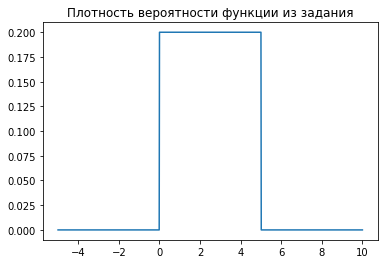

Плотность вероятности имеет максимум в точке 0.2


In [ ]:
a = 0
b = 5

uni = scipy.stats.uniform(a, b-a)
x = np.linspace(-5, 10, 1000)
pdf = uni.pdf(x)
plt.plot(x, pdf)
plt.title("Плотность вероятности функции из задания")
plt.show()

if 0.2 == uni.pdf(np.random.uniform(a, b)):
    print('Плотность вероятности имеет максимум в точке 0.2')
else:
    print('Максимум плотности вероятности найден неверно')

Проверим корректность расчета математического ожидания

In [ ]:
if 2.5 == scipy.integrate.quad(lambda x: x*1/5, 0, 5)[0]:
    print('Математическое ожидание расчитано верно')
else:
    print('Математическое ожидание расчитано неверно')

Математическое ожидание расчитано верно


Проверим корректность расчета вероятности попадания в отрезок $[3.5;7]$ 

In [ ]:
if 0.3 == round(scipy.integrate.quad(lambda x: 1/5, 3.5, 5)[0], 1):
    print('Вероятность попадания в интервал расчитано верно')
else:
    print('Вероятность попадания в интервал расчитано неверно')   

Вероятность попадания в интервал расчитано верно


- Задание 3


Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

In [ ]:
import math

def info(r, y, g, eps=3):
    s = r + y + g
    pr = r / s
    py = y / s
    pg = g / s
    ir = -math.log2(pr)
    iy = -math.log2(py)
    ig = -math.log2(pg)
    return (round(ir, eps), round(iy, eps), round(ig, eps))

i1 = info(54, 4, 28)
i2 = info(28, 28, 28)
print(f"Вариант 1 (К - 54, Ж - 4, З - 28) : I1 = {i1[0]}, I2 = {i1[1]}, I3 = {i1[2]}.")
print(f"Вариант 2 (К - 28, Ж - 28, З - 28) : I1 = {i2[0]}, I2 = {i2[1]}, I3 = {i2[2]}.")

Вариант 1 (К - 54, Ж - 4, З - 28) : I1 = 0.671, I2 = 4.426, I3 = 1.619.
Вариант 2 (К - 28, Ж - 28, З - 28) : I1 = 1.585, I2 = 1.585, I3 = 1.585.


Как видим, в первом варианте количество передаваемой информации разное. Причем, чем дольше горит цвет, тем меньше передается информации и наоборот. Во втором варианте количество передаваемой информации неизменно от цвета при неизменности длительности горения.